/Users/conorbarrycullen/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


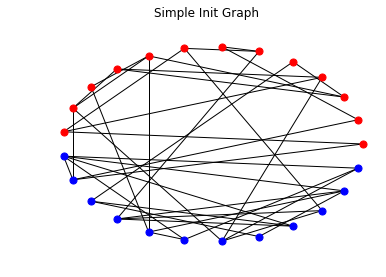

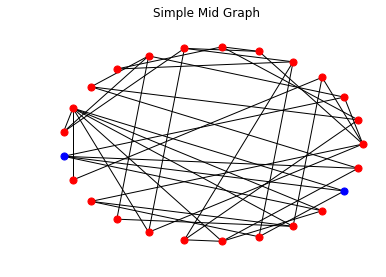

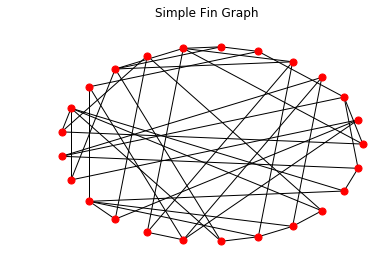

Average node connectivity is: 13.083333333333332


In [1]:
%matplotlib inline
#### Simple Network Hub Model ####
from random import *
import numpy as np
import scipy.stats as spst
import matplotlib.pyplot as plt
import pylab as pl
import networkx as nx
N = int(25) #Number of Nodes
C = float(10)/100 #Percentage Connectivity
margin = float(0.7) #Margin for beta distribution centered at 0.5
NConnect = [[0 for col in range(N)] for row in range(N)]
NWeight = [[0 for col in range(2)] for row in range(N)]
for i in range(N):
    NWeight[i][0] = i + 1
    if i <= float(N)/2:
        NWeight[i][1] = 1
    else:
        NWeight[i][1] = -1
        G=nx.erdos_renyi_graph(N,0)
        pos=nx.circular_layout(G)

def make_edges(NConnect,NWeight):
    for i in range(N):
        x=NWeight[i][1]
        if x==1:
            G.node[i]['type']=0
        else:
            G.node[i]['type']=1
            
    for i in range(N):
        for j in range(N):
            if G.has_edge(i,j):
                G.remove_edge(i,j)
                
    for i in range(N):
        for j in range(N):
            x=NConnect[i][j]
            if x==1:
                G.add_edge(i,j)
                
    type0_node_list = [n for (n,d) in G.nodes(data=True) if d['type'] == 0]
    type1_node_list = [n for (n,d) in G.nodes(data=True) if d['type'] == 1]

    return type0_node_list,type1_node_list

def display_graph(type0_node_list, type1_node_list,edges):
    nx.draw_networkx_nodes(G,pos,\
                            nodelist=type0_node_list,\
                            node_color='r',\
                            node_size=50)
    nx.draw_networkx_nodes(G,pos,\
                            nodelist=type1_node_list,\
                            node_color='b',\
                            node_size=50)
    nx.draw_networkx_edges(G,pos,\
                            edgelist=edges)
    plt.axis('off')
    plt.show()
    
### Function for adding a connection between two points ###
def AddCon(x, y, NConnect):
    if x == y:
        return NConnect
    else:
        NConnect[x][y] = 1
        NConnect[y][x] = 1
        return NConnect

### Function for deleting a connection between two points ###
def DelCon(x, y, NConnect):
    if x == y:
        return NConnect
    else:
        NConnect[x][y] = 0
        NConnect[y][x] = 0
        return NConnect
    
### Function to compare weights (True if the same) ###
def WeightCheckBool(i, j, NWeight):
    Bool = NWeight[i][1] == NWeight[j][1]
    return Bool

### Function to determine if a weight should change ###
def WeightCheck(NConnect, N, NWeight, x):
    global margin
    
    #Sum of connected weights for ratio
    a = 1 #1
    b = 1 #-1
    
    for i in range(N):
        if NConnect[x][i] == 1:
            w = NWeight[i][1]
            if w == 1:
                a = a+1
            else:
                b = b+1
                    
    z = spst.beta.rvs(a,b,0,1)
    if z > (1+margin)*0.5:
        NWeight[x][1] = 1
    elif z < (1-margin)*0.5:
        NWeight[x][1] = -1
    return NWeight

### Function to determine if a connection should change ###
def ConCheck(NConnect, N, NWeight, x, y):
    r = float(sum(NConnect[x]))/(N-1)
    #print(r)
    Bool = NConnect[x][y] == 1 #True if connection else False
    Check = WeightCheckBool(x, y, NWeight)
    v = float(0.0)
    if Bool: #Connection is there
        if Check:
            if C >= (1-v)*r:
                if np.random.choice([True, False], p = [0.05, 0.95]):
                    NConnect = AddCon(x, y, NConnect)
            elif C <= (1+v)*r:
                if np.random.choice([True, False], p = [0.025, 0.975]):
                    NConnect = DelCon(x, y, NConnect)
        else:
            if C >= (1-v)*r:
                if np.random.choice([True, False], p = [0.025, 0.975]):
                    NConnect = AddCon(x, y, NConnect)
            elif C <= (1+v)*r:
                if np.random.choice([True, False], p = [0.05, 0.95]):
                    NConnect = DelCon(x, y, NConnect)
                    
    else: #Connection is not there
        if C >= (1-v)*r:
            if Check:
                if np.random.choice([True, False], p = [0.05, 0.95]):
                    NConnect = AddCon(x, y, NConnect)
            else:
                if np.random.choice([True, False], p = [0.025, 0.975]):
                    NConnect = AddCon(x, y, NConnect)
        elif C <= (1+v)*r:
            if Check:
                if np.random.choice([True, False], p = [0.025, 0.975]):
                    NConnect = DelCon(x, y, NConnect)
            else:
                if np.random.choice([True, False], p = [0.05, 0.95]):
                    NConnect = DelCon(x, y, NConnect)

    return NConnect

def UpdateCon(NConnect, N, NWeight):
    for i in range(N):
        for j in range(N):
            NConnect = ConCheck(NConnect, N, NWeight, i, j)
    return NConnect

def UpdateWeight(NConnect, N, NWeight):
    for i in range(N):
        NWeight = WeightCheck(NConnect, N, NWeight, i)
    return NWeight

### Start program ###
#NConnect = InitMat(NConnect, N)
for i in range(100):
#Initialise network with appropriate connections
    NConnect = UpdateCon(NConnect, N, NWeight)
    
type0_node_list,type1_node_list=make_edges(NConnect,NWeight)
fig1 = plt.figure()
fig1.suptitle('Simple Init Graph')

display_graph(type0_node_list, type1_node_list,G.edges())

con=(nx.average_node_connectivity(G)/(N-1))
count = 0

while count < 50:
    count = count + 1
    con=(nx.average_node_connectivity(G)/(N-1))
    NConnect = UpdateCon(NConnect, N, NWeight)
    NWeight = UpdateWeight(NConnect, N, NWeight)
    type0_node_list,type1_node_list=make_edges(NConnect,NWeight)
    if count==25:
        fig2 = plt.figure()
        fig2.suptitle('Simple Mid Graph')
        display_graph(type0_node_list, type1_node_list,G.edges())

fig3 = plt.figure()
fig3.suptitle('Simple Fin Graph')
display_graph(type0_node_list, type1_node_list,G.edges())


con=(nx.average_node_connectivity(G)/(N-1))*100
print("Average node connectivity is: " + str(con))

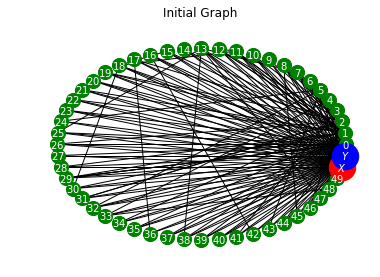

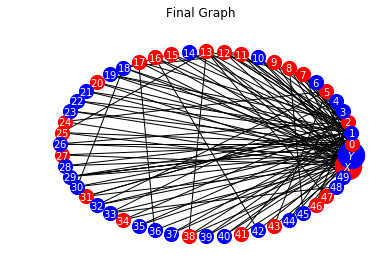

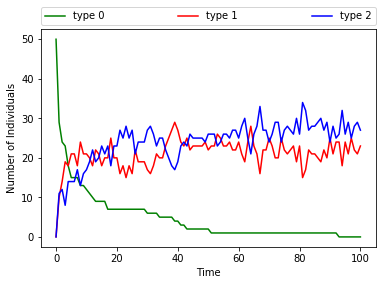

In [2]:
#### Social Network Model ####
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy
import collections
import pylab as pl
import itertools

N = 50
n0=[]
n1=[0]
n2=[0]
w=numpy.ones(N)
a=0.5
b=0.5

NConnect = [[0 for col in range(N)] for row in range(N)]
NWeight = [[0 for col in range(2)] for row in range(N)]
def weight(a,b):
    for i in range(N):
        NWeight[i][0] = i
        NWeight[i][1] = numpy.random.choice([1, -1], p = [a, b])
    return NWeight

#Assign weights to nodes
NWeight=weight(a,b)
w2=dict(NWeight)

#Create the network
G = nx.MultiGraph()
#E=nx.erdos_renyi_graph(N,1) #Fully Connected Network
#E=nx.erdos_renyi_graph(N,0.05) #Erdos-Renyi Network
E=nx.scale_free_graph(N).to_undirected() #Scale-Free Network
G.add_nodes_from(E)
G.add_edges_from(E.edges())
H=nx.Graph()
H.add_path([N,N+1])
H.remove_edge(N,N+1)
G.add_nodes_from(H)
for i in range(N):
        G.add_edge(N,i)
        G.add_edge(N+1,i)

pos=nx.circular_layout(G)
labels={}
for i in range(N):
    labels[i]='$'+str(i)+'$'
labels[N]='$X$'
labels[N+1]='$Y$'

#Separate nodes into types
for n in G.nodes():
    G.node[n]['type'] = 0
type0_node_list = [n for  (n,d) in G.nodes(data=True) if d['type'] == 0]
type1_node_list = [n for  (n,d) in G.nodes(data=True) if d['type'] == 1]
type2_node_list = [n for  (n,d) in G.nodes(data=True) if d['type'] == 2]

edges=list(G.edges())
hub_edges=[]
for (u,v) in edges:
        if v==N or v==N+1:
                hub_edges.append((u,v))
counter=collections.Counter(hub_edges)

def newEdge(edges_n,w,w2,counter):
    pi=numpy.zeros(N)
    for (u,v) in edges_n:
        try:
            m= counter[(u,v)]
        except KeyError:
            m=0.
        pi[u]=m*w[u]
    cpi = numpy.cumsum(pi)
    #Chooses random edge to create with hub X (y=N) or Y (y=N+1)
    u=random.uniform(0,max(cpi))
    x=numpy.searchsorted(cpi, u)
    if w2[x]==1:
        y=N
    else:
        y=N+1
    newedge = (x,y)
    return newedge

def change_node(edge,type0_node_list):
        u=edge[0][0]
        v=edge[0][1]
        type0=u in type0_node_list
        #Join algorithm
        if ((u,v) in G.edges())==True and type0==True:
                if v==N:
                        G.remove_edge(u,v)
                        G.node[u]['type']=2
                else:
                        G.remove_edge(u,v)
                        G.node[u]['type']=1
        #Switch algorithm
        elif ((u,v) in G.edges())==False and type0==False:
                if v==N:
                        n=N+1
                        G.remove_edge(u,n)
                        G.add_edge(u,v)
                        G.node[u]['type']=1
                else:
                        n=N
                        G.remove_edge(u,n)
                        G.add_edge(u,v)
                        G.node[u]['type']=2
        #Return if neither algorithm can be used
        else:
            return
        

def display_graph(type0_node_list, type1_node_list, type2_node_list, title):
        #draw the type0 nodes (i.e. neutral individuals)
        nx.draw_networkx_nodes(G,pos,
                                nodelist=type0_node_list,
                                node_color='g',
                                node_size=200)
        #draw the hubs
        nx.draw_networkx_nodes(G,pos,
                                nodelist=[N],
                                node_color='r',
                                node_size=700)
        nx.draw_networkx_nodes(G,pos,
                                nodelist=[N+1],
                                node_color='b',
                                node_size=700)
        #draw the updated nodes of individuals
        nx.draw_networkx_nodes(G,pos,
                                nodelist=type1_node_list,
                                node_color='r',
                                node_size=200)
        nx.draw_networkx_nodes(G,pos,
                                nodelist=type2_node_list,
                                node_color='b',
                                node_size=200)
        #draw the edges and labels
        nx.draw_networkx_edges(G,pos,
                                edgelist=G.edges())
        nx.draw_networkx_labels(G,pos,labels,font_color='w',font_size=10)
        plt.suptitle(title)
        plt.axis('off')
        plt.show()
        
n0+=[len(type0_node_list)-2]
days=0
network=dict([(k,list(v.keys())) for k,v in  E.adjacency()])
#Show the initial network
display_graph(type0_node_list, type1_node_list, type2_node_list, 'Initial Graph')
for i in range(100):
        new_edges=[]
        counter=collections.Counter(hub_edges)
        #Update the weights
        NWeight=weight(a,b)
        w2=dict(NWeight)
        for i in range(N):
                neighbours=network[i]
                edges_n=[]
                for j in range(len(neighbours)):
                        edges_n.append([item for item in hub_edges if neighbours[j] in item])
                edges_n = list(itertools.chain.from_iterable(edges_n))
                counter=collections.Counter(edges_n)
                new_edges.append(newEdge(edges_n,w,w2,counter))
        newedges=new_edges
        for (u,v) in newedges:
                type0_node_list = [n for  (n,d) in G.nodes(data=True) if d['type'] == 0]
                change_node([(u,v)],type0_node_list)
        n0+=[len(type0_node_list)-2]
        type1_node_list = [n for  (n,d) in G.nodes(data=True) if d['type'] == 1]
        n1+=[len(type1_node_list)]
        type2_node_list = [n for  (n,d) in G.nodes(data=True) if d['type'] == 2]
        n2+=[len(type2_node_list)]
        days += 1
#Show the final network
display_graph(type0_node_list, type1_node_list, type2_node_list, 'Final Graph')

#Plot a graph of time against number of individuals of each type
plt.plot(n0,'g-',label='type 0')
plt.plot(n1,'r-',label='type 1')
plt.plot(n2,'b-',label='type 2')
plt.xlabel("Time")
plt.ylabel("Number of Individuals")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=3, mode="expand", borderaxespad=0.)
plt.show()

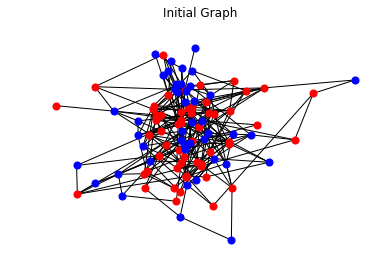

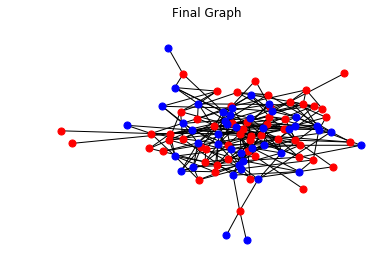

In [3]:
#### Network Segregation Model ####
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy
import collections
import pylab as pl
import itertools

#Population
N = 100
#Aversion bias
p=1
#Random graph with probability 0.05 of each node forming an edge
G=nx.erdos_renyi_graph(N,0.05)
E=len(G.edges())
#Assign random weights to each edge
for (u,v,d) in G.edges(data=True):
    d['weight'] = random.uniform(0,1)
labels={}
for i in range(N):
    labels[i]='$'+str(i)+'$'
    x=random.randint(0,1)
    if x==0:
        G.node[i]['type']=0
    else:
        G.node[i]['type']=1

#Separate nodes into their specific types
type0_node_list = [n for  (n,d) in G.nodes(data=True) if d['type'] == 0]
type1_node_list = [n for  (n,d) in G.nodes(data=True) if d['type'] == 1]
#Convert weights and edges to list form
weights=[d['weight'] for (u,v,d) in G.edges(data=True)]
edges=list(G.edges())

def display_graph(type0_node_list, type1_node_list,edges,weights):
    pos=nx.spring_layout(G,weight='weight')
    
    for i in range(1,len(pos)-1):
        for j in range(1):
            pos[i][j]=pos[i][j]*weights[i]
    
    nx.draw_networkx_nodes(G,pos,
                            nodelist=type0_node_list,
                            node_color='r',
                            node_size=50)
    nx.draw_networkx_nodes(G,pos,
                            nodelist=type1_node_list,
                            node_color='b',
                            node_size=50)
    nx.draw_networkx_edges(G,pos,
                            edgelist=edges,
                            length=weights)
    plt.axis('off')
    plt.show()
    
fig1 = plt.figure()
fig1.suptitle('Initial Graph')
display_graph(type0_node_list, type1_node_list, G.edges(data=True),weights)

network=dict([(k,list(v.keys())) for k,v in  G.adjacency()])

'''
Function for rewiring edges where the list of edges is an input.
Chooses a random edge to delete and then adds a new weighted edge
based to a different pair of nodes
'''
def rewire(edges):
    elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >0.5]
    esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <=0.5]
    r=random.randint(0,len(edges)-1)
    edge=edges[r]
    u=edge[0]
    neighbours_u=list(G.neighbors(u))
    v=edge[1]
    neighbours_v=list(G.neighbors(v))
    for (x,y,d) in G.edges(data=True):
        if (x,y)==(u,v):
            try:
                w=d['weight']
                break
            except KeyError:
                return
    #Probability of tie deletion
    pr=w*p
    if random.uniform(0,1)<pr:
        return
    z=random.randint(0,1)
    for (x,y,d) in G.edges(data=True):
        if z==0 and x==u:
            new=random.choice(list(G.nodes()^neighbours_u))
            G.remove_edge(u,v)
            G.add_weighted_edges_from([(u,new,random.uniform(3,4))])
            return
        elif z==1 and x==v:
            new=random.choice(list(G.nodes()^neighbours_v))
            G.remove_edge(u,v)
            G.add_weighted_edges_from([(new,v,random.uniform(-3,-4))])
            return

#Rewires edges for 10000 iterations
for i in range(10000):
    edges=list(G.edges())
    rewire(edges)
    weights=[d['weight'] for (u,v,d) in G.edges(data=True)]

#Plots the final graph which should have reached the Markov stationary point
fig2 = plt.figure()
fig2.suptitle('Final Graph')
display_graph(type0_node_list, type1_node_list,G.edges(data=True),weights)
